In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("white")

In [5]:
df_train = pd.read_csv("./timing_train.csv")
df_train.head(5)

,timestamp,task,name,seed,duration
0,2024-05-20 11:58:05.453,train,baseline,43,184.128798
1,2024-05-20 11:46:18.206,train,integrated,43,835.209234


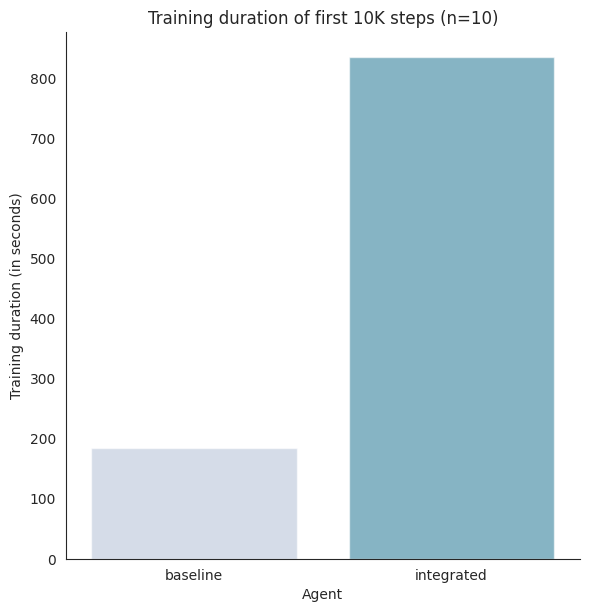

In [8]:
sns.set_style("white")
sns.catplot(data=df_train, kind="bar", x="name", y="duration", errorbar=None, alpha=.6, hue='name', palette='PuBuGn', height=6).set(title="Training duration of first 10K steps (n=10)", xlabel="Agent", ylabel="Training duration (in seconds)")

In [13]:
df_steps = pd.read_csv("./timing_step.csv")
df_steps.head(5)

,timestamp,task,name,seed,duration
0,2024-05-20 11:55:01.335,steps,baseline,43,0.009771
1,2024-05-20 11:55:01.343,steps,baseline,43,0.008574
2,2024-05-20 11:55:01.352,steps,baseline,43,0.008574
3,2024-05-20 11:55:01.361,steps,baseline,43,0.008555
4,2024-05-20 11:55:01.369,steps,baseline,43,0.008588


[Text(0.5, 1.0, 'Duration of a single step per, per agent'),
 Text(0.5, 0, 'Agent'),
 Text(0, 0.5, 'Duration (in milliseconds)')]

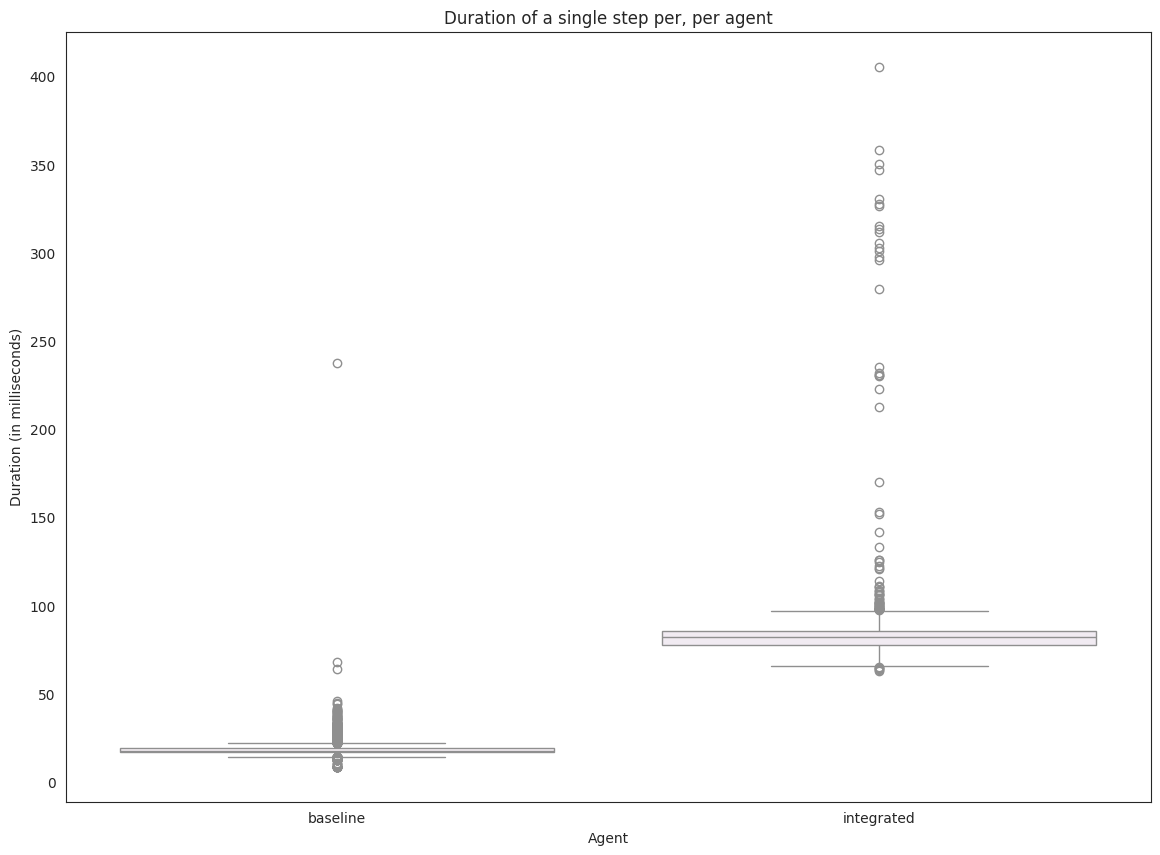

In [15]:
df_steps["duration_millis"] = df_steps["duration"] * 1000
plt.figure(figsize=(14, 10))
sns.set_style("white")
sns.set_palette(palette='PuBuGn', desat=0.9, n_colors=23)
sns.boxplot(x ="name", y="duration_millis", data = df_steps, hue="name", legend=False).set(title='Duration of a single step per, per agent', xlabel="Agent", ylabel="Duration (in milliseconds)")

In [16]:
df_symbolic = pd.read_csv("./timing_symbolic.csv")
df_symbolic.head(5)

,timestamp,task,name,seed,duration
0,2024-05-20 11:32:23.065,track_action,integrated,43,0.000019
1,2024-05-20 11:32:23.138,track_action,integrated,43,0.000018
2,2024-05-20 11:32:23.205,track_action,integrated,43,0.000018
3,2024-05-20 11:32:23.274,track_action,integrated,43,0.000037
4,2024-05-20 11:32:23.346,track_action,integrated,43,0.000020


In [17]:
# track_action is trivial. It isn't symbolic in the first place. Delete.
df_symbolic.drop(df_symbolic[df_symbolic.task == "track_action"].index, inplace=True)
df_symbolic.head(5)

,timestamp,task,name,seed,duration
10193,2024-05-20 11:33:34.590,try_induction,integrated,43,0.006414
10194,2024-05-20 11:34:51.254,try_induction,integrated,43,0.003992
10195,2024-05-20 11:36:08.848,try_induction,integrated,43,0.005736
10196,2024-05-20 11:37:30.043,try_induction,integrated,43,0.005932
10197,2024-05-20 11:38:52.689,try_induction,integrated,43,0.005833


In [9]:
df_object_detection_P1 = pd.read_csv("../results/20240502-16.09.35_P1/logs/timing/symbolic/20240502-16.09.35_P1_detect_objects.csv", header=None)
# add column names
df_object_detection_P1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_object_detection_P1["name"] = "P1"

In [10]:
df_object_detection_C1 = pd.read_csv("../results/20240430-12.00.19_C1/logs/timing/symbolic/20240430-12.00.19_C1_detect_objects.csv", header=None)
# add column names
df_object_detection_C1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_object_detection_C1["name"] = "C1"

In [11]:
df_positioning_P1 = pd.read_csv("../results/20240502-16.09.35_P1/logs/timing/symbolic/20240502-16.09.35_P1_position_objects.csv", header=None)
# add column names
df_positioning_P1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_positioning_P1["name"] = "P1"

In [12]:
df_positioning_C1 = pd.read_csv("../results/20240430-12.00.19_C1/logs/timing/symbolic/20240430-12.00.19_C1_position_objects.csv", header=None)
# add column names
df_positioning_C1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_positioning_C1["name"] = "C1"

In [17]:
df_induction_P1 = pd.read_csv("../results/20240502-16.09.35_P1/logs/timing/symbolic/20240502-16.09.35_P1_try_induction.csv", header=None)
# add column names
df_induction_P1.columns =['timestamp', 'task', 'name', 'seed', 'episode','step', 'duration']
df_induction_P1["name"] = "P1"

In [19]:
df_induction_C1 = pd.read_csv("../results/20240430-12.00.19_C1/logs/timing/symbolic/20240430-12.00.19_C1_try_induction.csv", header=None)
# add column names
df_induction_C1.columns =['timestamp', 'task', 'name', 'seed', 'episode','step','duration']
df_induction_C1["name"] = "C1"

In [25]:
df_choose_action_P1 = pd.read_csv("../results/20240502-16.09.35_P1/logs/timing/symbolic/20240502-16.09.35_P1_choose_action_ddqn.csv", header=None)
# add column names
df_choose_action_P1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_choose_action_P1["name"] = "P1"

In [30]:
df_choose_action_C1 = pd.read_csv("../results/20240430-12.00.19_C1/logs/timing/symbolic/20240430-12.00.19_C1_choose_action_ddqn.csv", header=None)
# add column names
df_choose_action_C1.columns =['timestamp', 'task', 'seed', 'duration']
df_choose_action_C1["name"] = "C1"
df_choose_action_C1.head(5)

,timestamp,task,seed,duration,name
0,2024-04-30 12:00:21.014,choose_action_ddqn,1,0.000356,C1
1,2024-04-30 12:00:21.045,choose_action_ddqn,1,0.000425,C1
2,2024-04-30 12:00:21.075,choose_action_ddqn,1,0.000402,C1
3,2024-04-30 12:00:21.101,choose_action_ddqn,1,0.000349,C1
4,2024-04-30 12:00:21.126,choose_action_ddqn,1,0.000353,C1


In [35]:
df_baseline_step = pd.read_csv("../results/20240428-20.22.58_baseline_B2/logs/timing/20240428-20.22.58_baseline_B2_steps.csv", header=None)
df_baseline_step.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_baseline_step["name"] = "Baseline"

Text(0.5, 1.0, 'Anatomy of a single step by task')

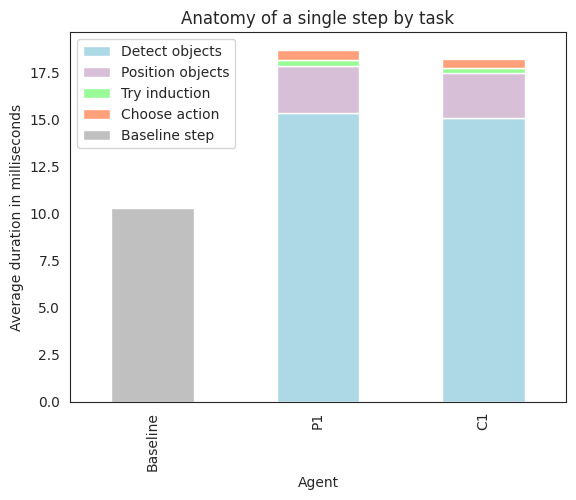

In [39]:
df = pd.DataFrame({'Detect objects': [0, df_object_detection_P1["duration"].mean() * 1000, df_object_detection_C1["duration"].mean() * 1000],
                   'Position objects': [0, df_positioning_P1["duration"].mean() * 1000, df_positioning_C1["duration"].mean() * 1000],
                   'Try induction': [0, df_induction_P1["duration"].mean(), df_induction_C1["duration"].mean()],
                   'Choose action': [0, df_choose_action_P1["duration"].mean() * 1000, df_choose_action_C1["duration"].mean() * 1000],
                   'Baseline step': [df_baseline_step["duration"].mean() * 1000, 0, 0]},
                  index=['Baseline', 'P1', 'C1'])
 
df.plot(kind='bar', stacked=True, color=['lightblue', 'thistle', 'palegreen', 'lightsalmon', 'silver'])
 
# labels for x & y axis
plt.xlabel('Agent')
plt.ylabel('Average duration in milliseconds')
 
# title of plot
plt.title('Anatomy of a single step by task')